In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
dataset = pd.read_csv(r'C:\Users\muthu\Datasets\Metro_Interstate_Traffic_Volume.csv')

In [3]:
dataset.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [4]:
dataset.dropna(inplace=True)


In [5]:
non_numeric_cols = dataset.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

In [6]:
import seaborn as sns

In [7]:
numeric_data = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                     traffic_volume   holiday      temp   rain_1h   snow_1h  \
traffic_volume             1.000000  0.018676  0.130299  0.004714  0.000733   
holiday                    0.018676  1.000000 -0.000472  0.000066  0.000432   
temp                       0.130299 -0.000472  1.000000  0.009069 -0.019755   
rain_1h                    0.004714  0.000066  0.009069  1.000000 -0.000090   
snow_1h                    0.000733  0.000432 -0.019755 -0.000090  1.000000   
clouds_all                 0.067054  0.007071 -0.101976  0.004818  0.027931   
weather_main              -0.040151 -0.004317 -0.033441  0.009535  0.036637   
weather_description       -0.067507 -0.002712 -0.049434  0.010774  0.005101   
date_time                 -0.007402  0.007451  0.030841 -0.002214  0.016408   

                     clouds_all  weather_main  weather_description  date_time  
traffic_volume         0.067054     -0.040151            -0.067507  -0.007402  
holiday                0.007071     -0.004317    

<AxesSubplot:>

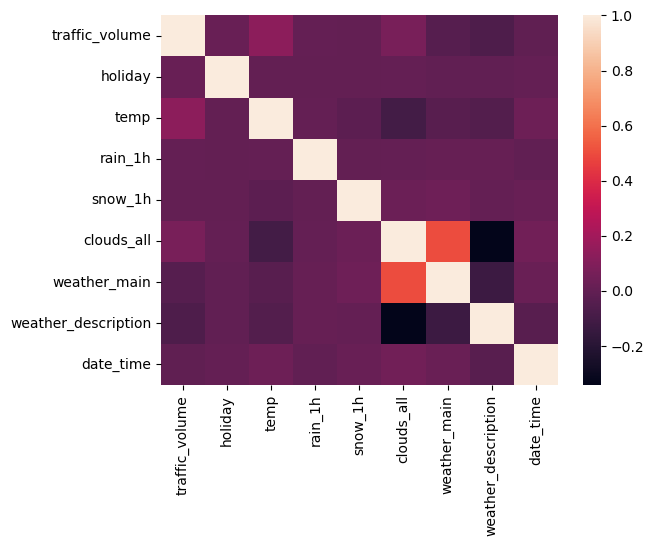

In [8]:
sns.heatmap(correlation_matrix)

In [9]:
dataset.describe()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,6.997780,281.205870,0.334264,0.000222,49.362231,2.578375,16.540536,20377.225438
std,1986.860670,0.139999,13.338232,44.789133,0.008168,39.015750,2.784224,8.970108,11657.664667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,7.000000,272.160000,0.000000,0.000000,1.000000,0.000000,10.000000,10308.750000
50%,3380.000000,7.000000,282.450000,0.000000,0.000000,64.000000,1.000000,17.000000,20519.500000
75%,4933.000000,7.000000,291.806000,0.000000,0.000000,90.000000,5.000000,27.000000,30500.250000
max,7280.000000,11.000000,310.070000,9831.300000,0.510000,100.000000,10.000000,37.000000,40574.000000


In [10]:
import matplotlib.pyplot as plt


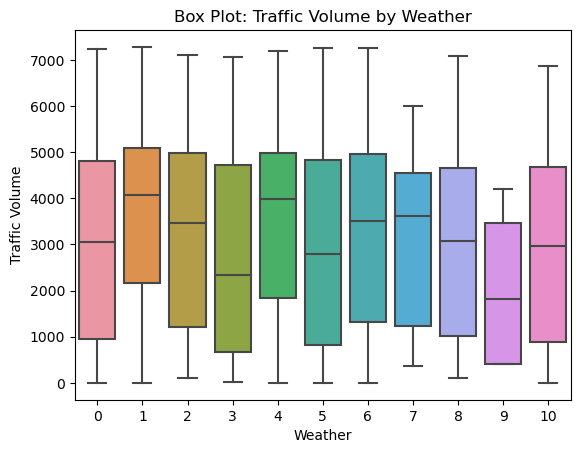

In [11]:
import seaborn as sns
sns.boxplot(x='weather_main', y='traffic_volume', data=dataset)
plt.xlabel('Weather')
plt.ylabel('Traffic Volume')
plt.title('Box Plot: Traffic Volume by Weather')
plt.show()

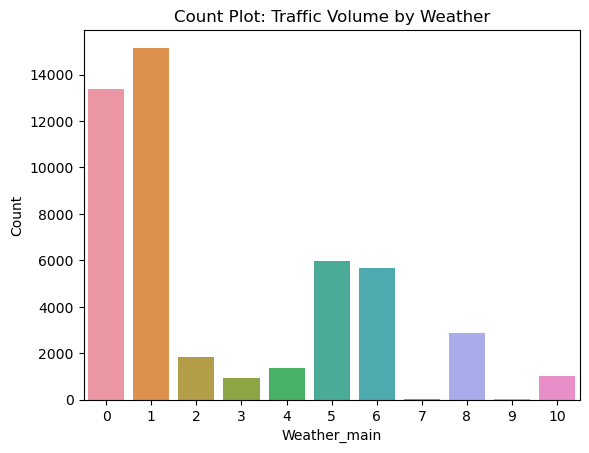

In [12]:

sns.countplot(x='weather_main', data=dataset)
plt.xlabel('Weather_main')
plt.ylabel('Count')
plt.title('Count Plot: Traffic Volume by Weather')
plt.show()

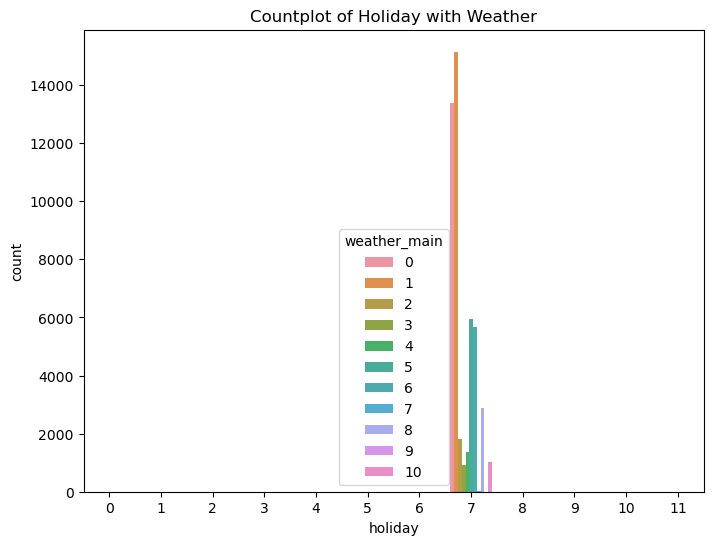

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='holiday', hue='weather_main', data=dataset)
plt.title('Countplot of Holiday with Weather')
plt.show()
data = dataset

Multivarient Analysis

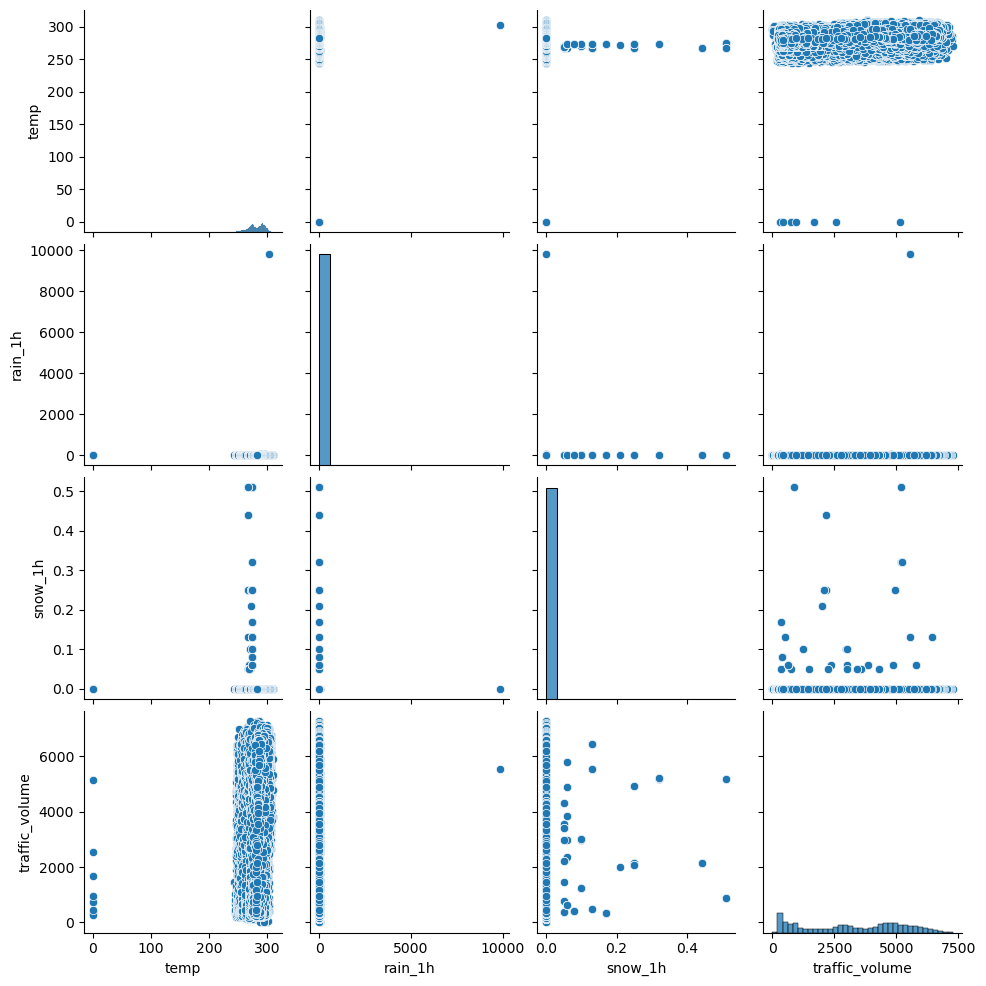

In [15]:
sns.pairplot(data[['temp', 'rain_1h', 'snow_1h', 'traffic_volume']])
plt.show()

Split the dataset into independent variables (X) and target variable (y)

In [16]:
X = dataset.drop('traffic_volume', axis=1)
y = dataset['traffic_volume']

Split the data into train and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Training Multiple Algorithm
 Initialize the models

In [19]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svm_reg = SVR()
xgboost_reg = xgb.XGBRegressor()

Fit the models with the training data

In [20]:
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)
xgboost_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Predict the models

In [21]:
linear_train_preds = linear_reg.predict(X_train)
tree_train_preds = decision_tree_reg.predict(X_train)
rf_train_preds = random_forest_reg.predict(X_train)
svm_train_preds = svm_reg.predict(X_train)
xgb_train_preds = xgboost_reg.predict(X_train)

Calculate score of the model

In [23]:
linear_train_accuracy = linear_reg.score(X_train, y_train)
tree_train_accuracy = decision_tree_reg.score(X_train, y_train)
rf_train_accuracy = random_forest_reg.score(X_train, y_train)
svm_train_accuracy = svm_reg.score(X_train, y_train)
xgb_train_accuracy = xgboost_reg.score(X_train, y_train)

In [24]:
print("Linear Regression:")
print("Train Predictions:", linear_train_preds)
print("Train Accuracy:", linear_train_accuracy)

Linear Regression:
Train Predictions: [3277.09746711 3081.348418   3102.46696365 ... 3760.60996812 3064.43173397
 3484.39698567]
Train Accuracy: 0.032183916227123244


In [25]:
print("Decision Tree Regression:")
print("Train Predictions:", tree_train_preds)
print("Train Accuracy:", tree_train_accuracy)


Decision Tree Regression:
Train Predictions: [2488. 4395. 4513. ... 5139. 2057. 4385.]
Train Accuracy: 1.0


In [26]:
print("Random Forest Regression:")
print("Train Predictions:", rf_train_preds)
print("Train Accuracy:", rf_train_accuracy)

Random Forest Regression:
Train Predictions: [2367.01 4453.72 3858.88 ... 4489.65 1957.86 4267.38]
Train Accuracy: 0.9246114326119674


In [27]:
print("Support Vector Regression:")
print("Train Predictions:", svm_train_preds)
print("Train Accuracy:", svm_train_accuracy)

Support Vector Regression:
Train Predictions: [3342.86777507 3395.06893126 3394.90366948 ... 3382.19702722 3368.9278589
 3347.04019027]
Train Accuracy: -0.0033791114193064686


In [28]:
print("XGBoost Regression:")
print("Train Predictions:", xgb_train_preds)
print("Train Accuracy:", xgb_train_accuracy)

XGBoost Regression:
Train Predictions: [1640.9581 2919.171  2964.1714 ... 4014.6814 3143.2563 4316.822 ]
Train Accuracy: 0.30159785208279777


Testing the model

In [32]:
linear_reg_pred = linear_reg.predict(X_test)
decision_tree_reg_pred = decision_tree_reg.predict(X_test)
random_forest_reg_pred = random_forest_reg.predict(X_test)
svm_reg_pred = svm_reg.predict(X_test)
xgboost_reg_pred = xgboost_reg.predict(X_test)

Print the predictions for evaluation

In [33]:
print("Linear Regression predictions:", linear_reg_pred)
print("Decision Tree Regression predictions:", decision_tree_reg_pred)
print("Random Forest Regression predictions:", random_forest_reg_pred)
print("SVM Regression predictions:", svm_reg_pred)
print("XGBoost Regression predictions:", xgboost_reg_pred)

Linear Regression predictions: [3143.80772757 3057.52939975 3426.95052104 ... 3533.66208137 3466.3079928
 3079.3245418 ]
Decision Tree Regression predictions: [2798. 2378. 5124. ... 4205. 2580.  910.]
Random Forest Regression predictions: [2903.42 2808.55 1896.63 ... 3570.22 3689.93 1486.19]
SVM Regression predictions: [3342.91360018 3387.17813007 3370.8269001  ... 3370.06580146 3366.94621156
 3343.69399844]
XGBoost Regression predictions: [2258.835  3216.5574 2856.8313 ... 3367.471  3946.6133 2505.9702]


In [34]:
from sklearn.metrics import r2_score

Calculate R2 score for each model

In [35]:
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
decision_tree_reg_r2 = r2_score(y_test, decision_tree_reg_pred)
random_forest_reg_r2 = r2_score(y_test, random_forest_reg_pred)
svm_reg_r2 = r2_score(y_test, svm_reg_pred)
xgboost_reg_r2 = r2_score(y_test, xgboost_reg_pred)

Print the R2 scores

In [36]:
print("Linear Regression R2 score:", linear_reg_r2)
print("Decision Tree Regression R2 score:", decision_tree_reg_r2)
print("Random Forest Regression R2 score:", random_forest_reg_r2)
print("SVM Regression R2 score:", svm_reg_r2)
print("XGBoost Regression R2 score:", xgboost_reg_r2)


Linear Regression R2 score: 0.034926228167993956
Decision Tree Regression R2 score: 0.10364522902563844
Random Forest Regression R2 score: 0.47033501612608253
SVM Regression R2 score: -0.0021159736417351027
XGBoost Regression R2 score: 0.18754316174385655


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Calculate MAE for each model

In [38]:
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_pred)
random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_pred)
svm_reg_mae = mean_absolute_error(y_test, svm_reg_pred)
xgboost_reg_mae = mean_absolute_error(y_test, xgboost_reg_pred)


Print the MAE values

In [39]:
print("Linear Regression MAE:", linear_reg_mae)
print("Decision Tree Regression MAE:", decision_tree_reg_mae)
print("Random Forest Regression MAE:", random_forest_reg_mae)
print("SVM Regression MAE:", svm_reg_mae)
print("XGBoost Regression MAE:", xgboost_reg_mae)

Linear Regression MAE: 1704.374526640469
Decision Tree Regression MAE: 1242.753656259724
Random Forest Regression MAE: 1118.6818068665077
SVM Regression MAE: 1745.38554570825
XGBoost Regression MAE: 1511.6032742425225


Calculate MSE for each model

In [40]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_pred)
random_forest_reg_mse = mean_squared_error(y_test, random_forest_reg_pred)
svm_reg_mse = mean_squared_error(y_test, svm_reg_pred)
xgboost_reg_mse = mean_squared_error(y_test, xgboost_reg_pred)


Print the MSE values

In [41]:
print("Linear Regression MSE:", linear_reg_mse)
print("Decision Tree Regression MSE:", decision_tree_reg_mse)
print("Random Forest Regression MSE:", random_forest_reg_mse)
print("SVM Regression MSE:", svm_reg_mse)
print("XGBoost Regression MSE:", xgboost_reg_mse)

Linear Regression MSE: 3815432.2424517535
Decision Tree Regression MSE: 3543750.7407945236
Random Forest Regression MSE: 2094037.6955162121
SVM Regression MSE: 3961879.0895647504
XGBoost Regression MSE: 3212059.1262141415


Building the model

In [43]:
import pickle

Assuming linear regression is the best model based on evaluation metrics

In [44]:
best_model = random_forest_reg


Save the best model

In [45]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
